## Regressione sui dati dei comuni Trentini

Uso i dati divisi per comune e per giorno dei 2 giorni precedenti per prevedere il consumo elettrico nel giorno successivo

In [17]:
import pandas as pd
import geopandas as gpd
import numpy as np

import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15, 25]


#from sklearn.linear_model import LogisticRegressionCV
#from sklearn.model_selection import GridSearchCV
#from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
#from sklearn.metrics import matthews_corrcoef, confusion_matrix, roc_curve, precision_recall_curve

## Importo i dati

In [3]:
data = pd.read_csv('data/processed/regressione_trentino.csv')
columns = data.columns

In [4]:
target = data['POWER']

In [5]:
features_names = columns[1:len(columns)-1]
features = data[features_names]

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=1)

In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Regressione lineare

In [8]:
LR = LinearRegression()
LR.fit(X_train, Y_train)

print(f"Score on train = {LR.score(X_train, Y_train)}")
print(f"Score on test = {LR.score(X_test, Y_test)}")


Score on train = 0.9871714608391197
Score on test = 0.9869427515912638


<BarContainer object of 17 artists>

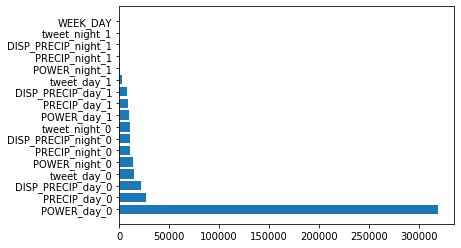

In [9]:
res = pd.DataFrame(data = LR.coef_, index = features_names, columns=['weight'],dtype=float).abs()
res.sort_values(by=['weight'], ascending = False, inplace = True)

plt.barh(y = features_names, width = res["weight"].tolist())

In [10]:
res

weight
POWER_night_0        319248.137305
POWER_night_1         27288.721036
POWER_day_1           21988.718061
POWER_day_0           14631.388993
DISP_PRECIP_day_1     13588.971097
PRECIP_day_1          10847.442654
PRECIP_day_0          10628.075334
WEEK_DAY              10489.123937
PRECIP_night_0        10085.775637
DISP_PRECIP_day_0      9286.683051
DISP_PRECIP_night_0    8241.066817
DISP_PRECIP_night_1    2724.578525
tweet_night_1          1061.015060
tweet_day_1            1061.015060
PRECIP_night_1          980.123427
tweet_day_0             206.172972
tweet_night_0           206.172972

## Lasso con Cross-Validation

In [26]:
LR = LassoCV(cv=10, random_state=0)
LR.fit(X_train, Y_train)

print(f"Score on train = {LR.score(X_train, Y_train)}")
print(f"Score on test = {LR.score(X_test, Y_test)}")


Score on train = 0.9870870095567649
Score on test = 0.9868645484705327


<BarContainer object of 17 artists>

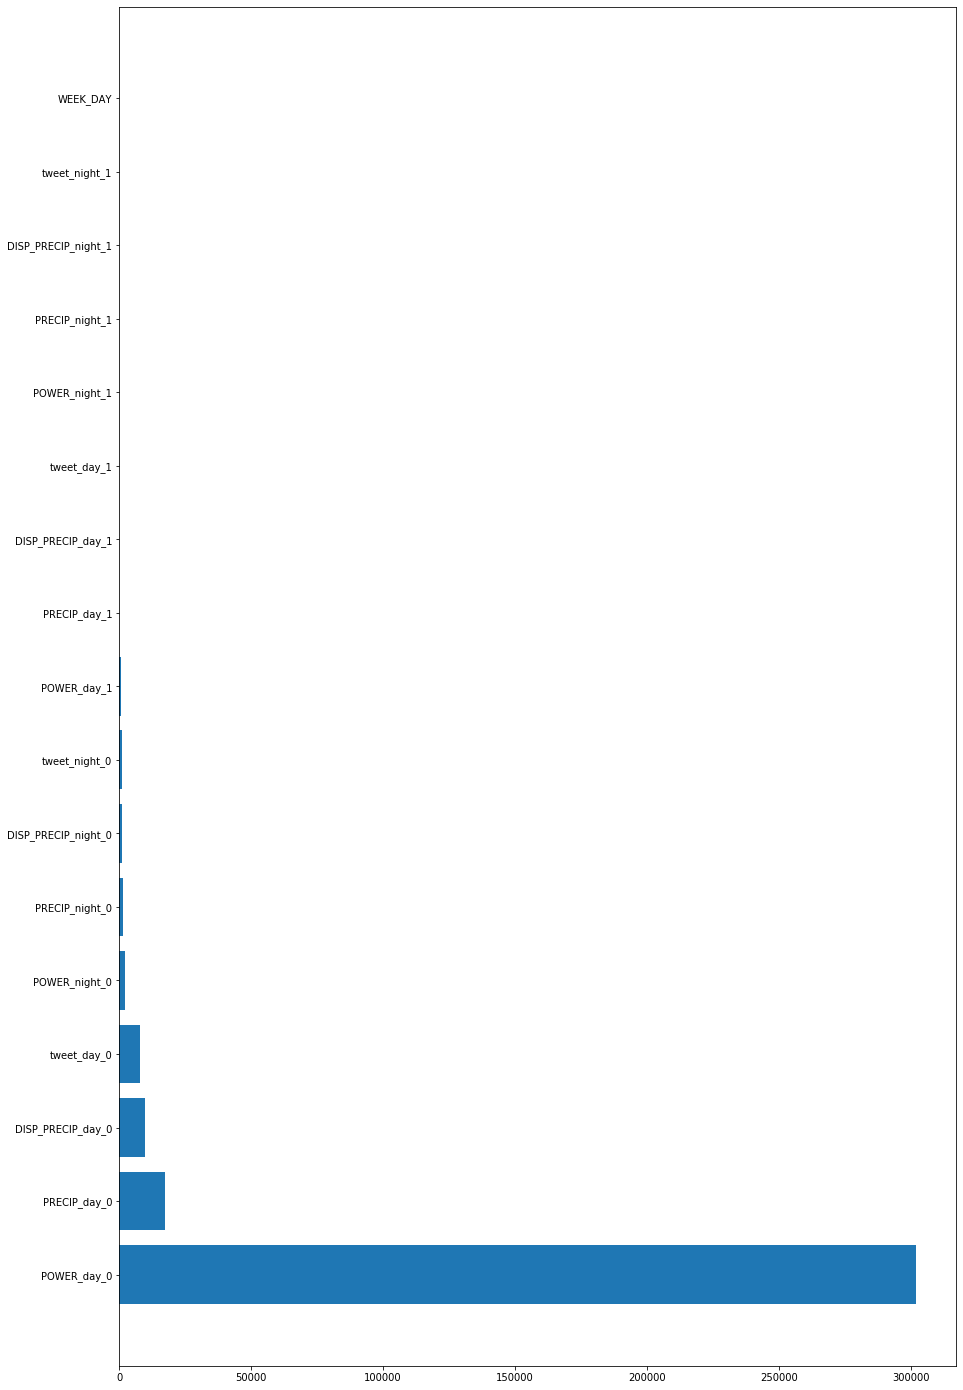

In [27]:
res = pd.DataFrame(data = LR.coef_, index = features_names, columns=['weight'],dtype=float).abs()
res.sort_values(by=['weight'], ascending = False, inplace = True)

plt.barh(y = features_names, width = res["weight"].tolist())

In [28]:
res

weight
POWER_night_0        302096.012725
POWER_day_0           17267.163157
WEEK_DAY               9902.277217
POWER_day_1            8000.866047
DISP_PRECIP_day_1      2386.163428
PRECIP_night_0         1619.255633
DISP_PRECIP_night_1    1028.081142
PRECIP_day_0            906.469430
tweet_day_1             616.642363
tweet_night_1             1.712247
tweet_day_0               0.000000
DISP_PRECIP_day_0         0.000000
DISP_PRECIP_night_0       0.000000
tweet_night_0             0.000000
PRECIP_day_1              0.000000
POWER_night_1             0.000000
PRECIP_night_1            0.000000

## Ridge con Cross Validation

In [23]:
LR = RidgeCV(cv=10) #da modificare a 100
LR.fit(X_train, Y_train)

print(f"Score on train = {LR.score(X_train, Y_train)}")
print(f"Score on test = {LR.score(X_test, Y_test)}")


Score on train = 0.9871714608322104
Score on test = 0.9869427488101571


<BarContainer object of 17 artists>

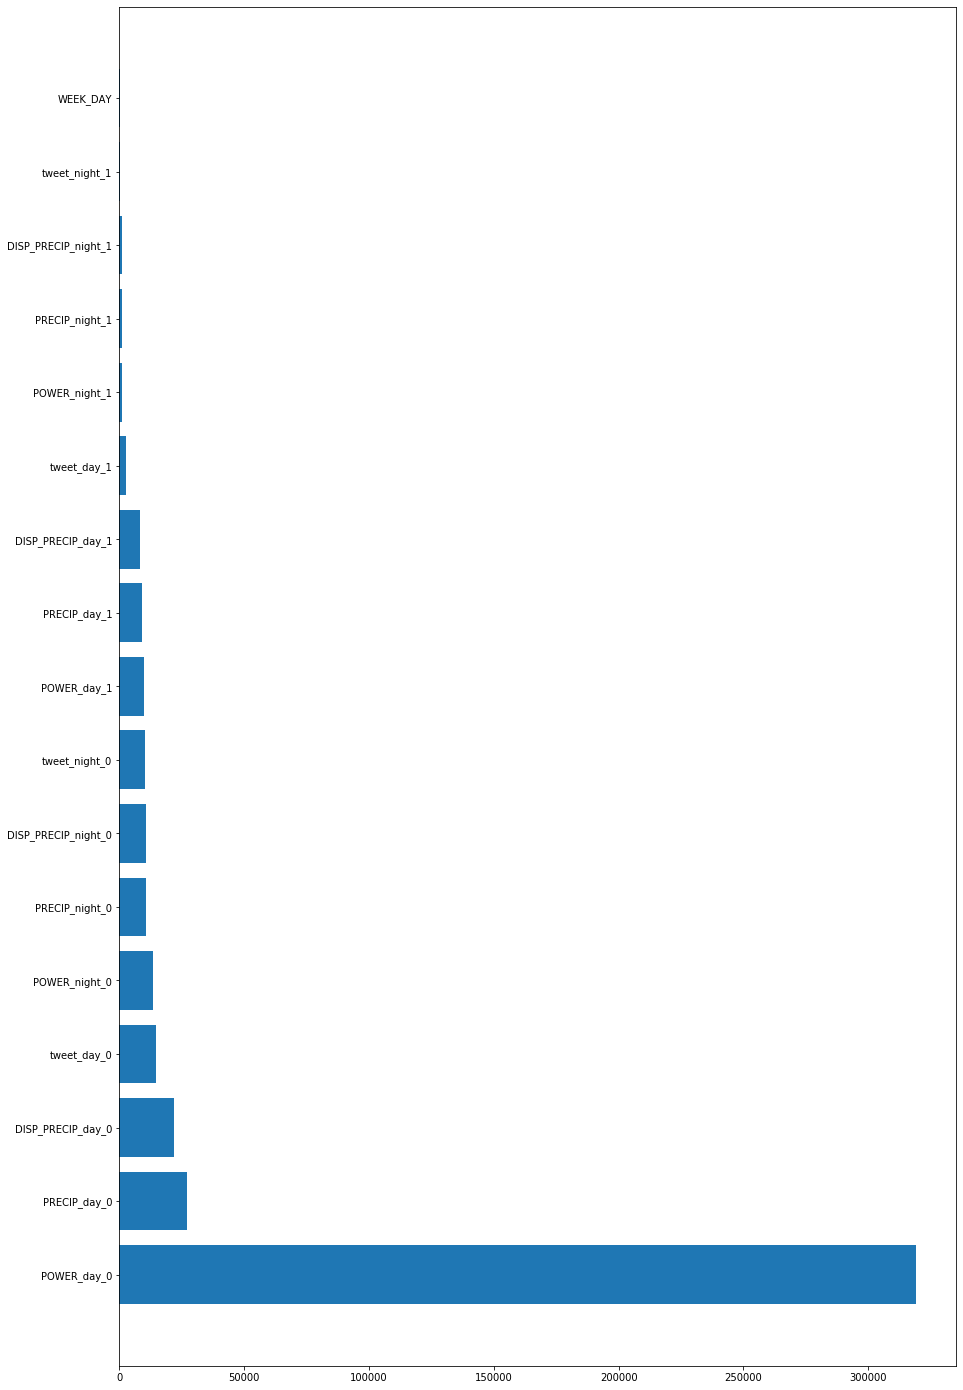

In [24]:
res = pd.DataFrame(data = LR.coef_, index = features_names, columns=['weight'],dtype=float).abs()
res.sort_values(by=['weight'], ascending = False, inplace = True)

plt.barh(y = features_names, width = res["weight"].tolist())

In [25]:
res

weight
POWER_night_0        319238.614520
POWER_night_1         27280.569302
POWER_day_1           21985.295644
POWER_day_0           14636.041174
DISP_PRECIP_day_1     13587.927123
PRECIP_day_1          10846.309053
PRECIP_day_0          10627.196738
WEEK_DAY              10489.135958
PRECIP_night_0        10085.647589
DISP_PRECIP_day_0      9285.891854
DISP_PRECIP_night_0    8240.934468
DISP_PRECIP_night_1    2724.381735
tweet_day_1            1061.006289
tweet_night_1          1061.006274
PRECIP_night_1          979.918264
tweet_day_0             206.234983
tweet_night_0           206.234981

## Conclusione
Tutti e tre i modelli sembrano funzionare ugualmente bene, in particolare tutti raggiungono errori sul set di train di circa 0.987 e 0.986 sul set di test. Il LassoCV presenta un accuratezza leggermente inferiore tuttavia usa meno dati, questo potrebbe essere un vantaggio in termini di velocità e memoria utilizzata. 